In [1]:
# base = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Autumn18/maxbtag/QCD'
# qcd = os.listdir('/eos/uscms/store/user/srosenzw/sixb/ntuples/Autumn18/maxbtag/QCD')
# qcd = [f for f in qcd if 'QCD' in f]
# qcd = [f"{base}/{q}/ntuple.root" for q in qcd]
# qcd
# qcd.append('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root')
# with open("filelists/bkg_training.txt", "w") as f:
#     f.write("\n".join(qcd) + "\n")

In [2]:
savepath = 'plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg'
# savepath = 'plots/feynnet/version_23183119'
# savepath = 'plots/nonML'

In [3]:
def get_mx_my(mass):
    mx = int(mass.split('/')[-2].split('_')[2].split('-')[1])
    my = int(mass.split('/')[-2].split('_')[3].split('-')[1])
    return mx, my

mx_my_masses = [get_mx_my(mass) for mass in get_NMSSM_list()]
mx_my_masses = [[mx,my] for mx,my in mx_my_masses if mx < 1300]
MX = np.unique(np.array(mx_my_masses)[:,0])

In [17]:
eff = {int(mx):{} for mx in MX}
res = {int(mx):{} for mx in MX}
sr = {int(mx):{} for mx in MX}
reco = {int(mx):{} for mx in MX}
for mx,my in mx_my_masses:
    # if mx > 1200: continue
    tree = SixB(get_NMSSM(mx,my, private=True, selection='maxbtag'), feyn=False)
    tree.spherical_region()
    # e = ak.sum(tree.n_H_paired_correct[tree.resolved_mask] == 3) / ak.sum(tree.resolved_mask)
    # eff[int(mx)][int(my)] = round(e,3)
    # res[int(mx)][int(my)] = ak.sum(tree.resolved_mask)/len(tree.resolved_mask)
    # sr[int(mx)][int(my)] = ak.sum(tree.asr_hs_mask)/len(tree.asr_hs_mask)
    reco[int(mx)][int(my)] = np.average(tree.n_h_possible)

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_250_2M/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_300/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_350/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_400_2M/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_450_2M/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_500_2M/ntuple.root
REGION: concentric
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_1000_MY_600_3M/ntuple.r

In [6]:
from pandas import DataFrame
import seaborn as sns

In [7]:
df = DataFrame.from_dict(eff)
df = df.reindex(index=df.index[::-1])
df

,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661,0.720
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583,0.673,0.750,0.747
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552,0.653,0.717,0.754,0.771,0.751
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489,0.616,0.690,0.730,0.755,0.773,0.776,0.751
500,NaN,NaN,NaN,NaN,NaN,0.398,0.540,0.626,0.686,0.723,0.756,0.773,0.778,0.777,0.746
450,NaN,NaN,NaN,NaN,0.343,0.479,0.577,0.647,0.699,0.732,0.751,0.760,0.771,0.763,0.725
400,NaN,NaN,NaN,0.286,0.399,0.499,0.578,0.641,0.677,0.698,0.720,0.728,0.731,0.713,0.671
350,NaN,NaN,0.213,0.281,0.376,0.451,0.523,0.563,0.596,0.610,0.618,0.627,0.613,0.593,0.557
300,NaN,0.143,0.177,0.257,0.345,0.411,0.460,0.502,0.528,0.533,0.546,0.547,0.537,0.514,0.467


In [ ]:
df_res = DataFrame.from_dict(res)
df_res = df_res.reindex(index=df_res.index[::-1])

df_sr = DataFrame.from_dict(sr)
df_sr = df_sr.reindex(index=df_sr.index[::-1])

df_reco = DataFrame.from_dict(reco)
df_reco = df_reco.reindex(index=df_reco.index[::-1])

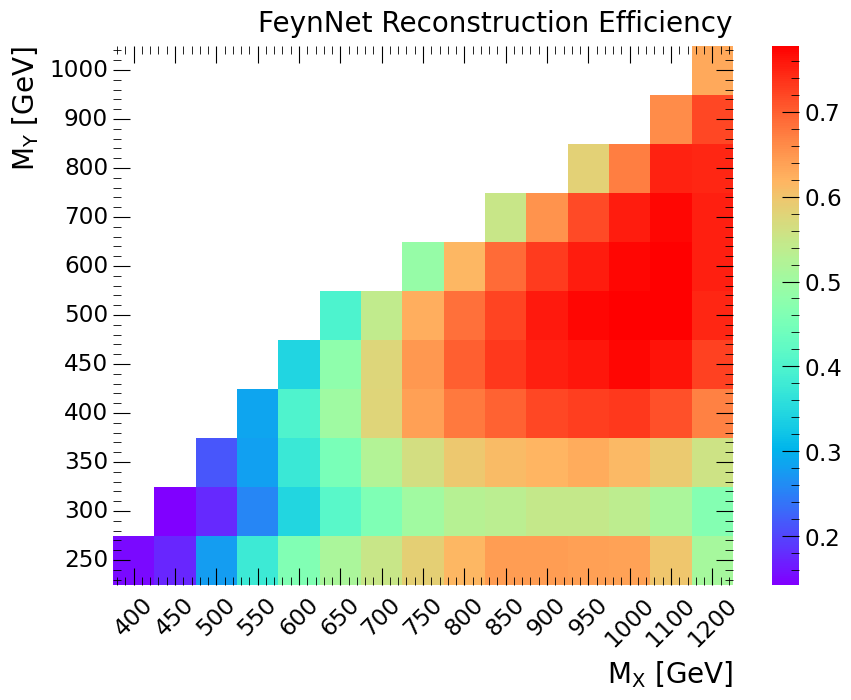

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df, cmap='rainbow', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_ylabel(r"$M_Y$ [GeV]")
ax.set_title("FeynNet Reconstruction Efficiency")
fig.savefig(f'{savepath}/feynnet_efficiency.pdf', bbox_inches='tight')

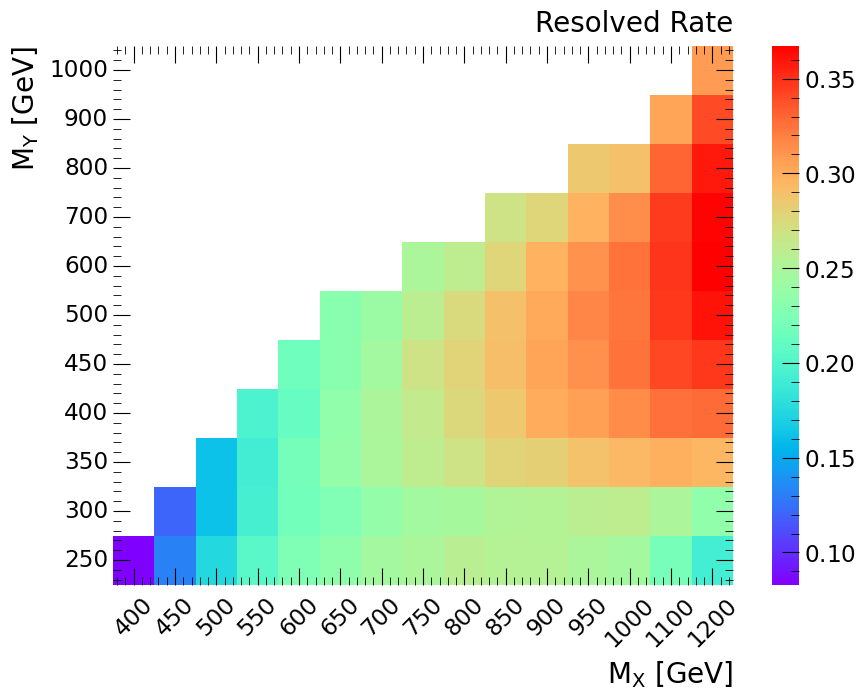

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_res, cmap='rainbow', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_ylabel(r"$M_Y$ [GeV]")
ax.set_title("Resolved Rate")
fig.savefig(f'{savepath}/resolved_rate.pdf', bbox_inches='tight')

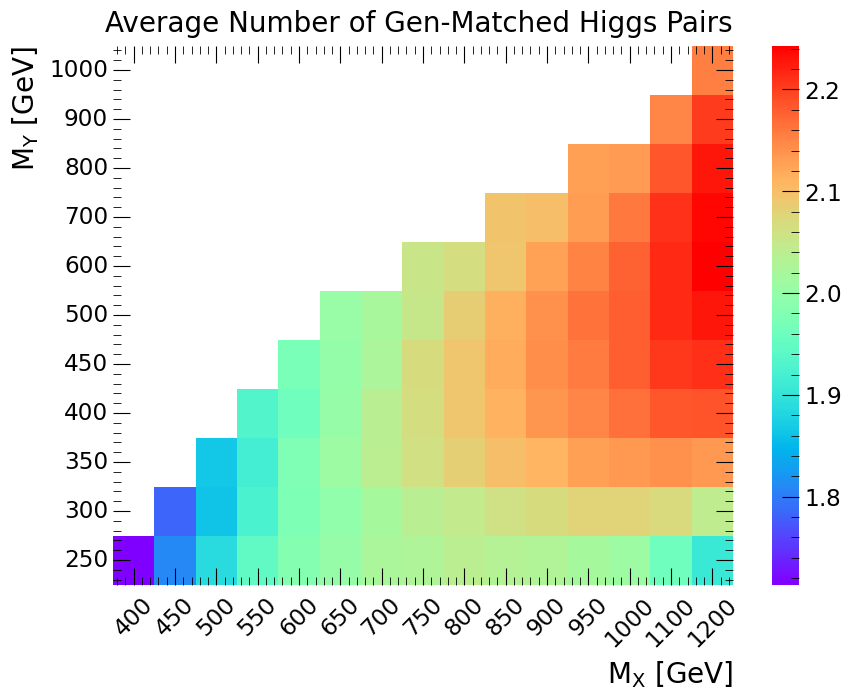

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_reco, cmap='rainbow', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_ylabel(r"$M_Y$ [GeV]")
ax.set_title("Average Number of Gen-Matched Higgs Pairs")
# fig.savefig(f'{savepath}/h_possible.pdf', bbox_inches='tight')

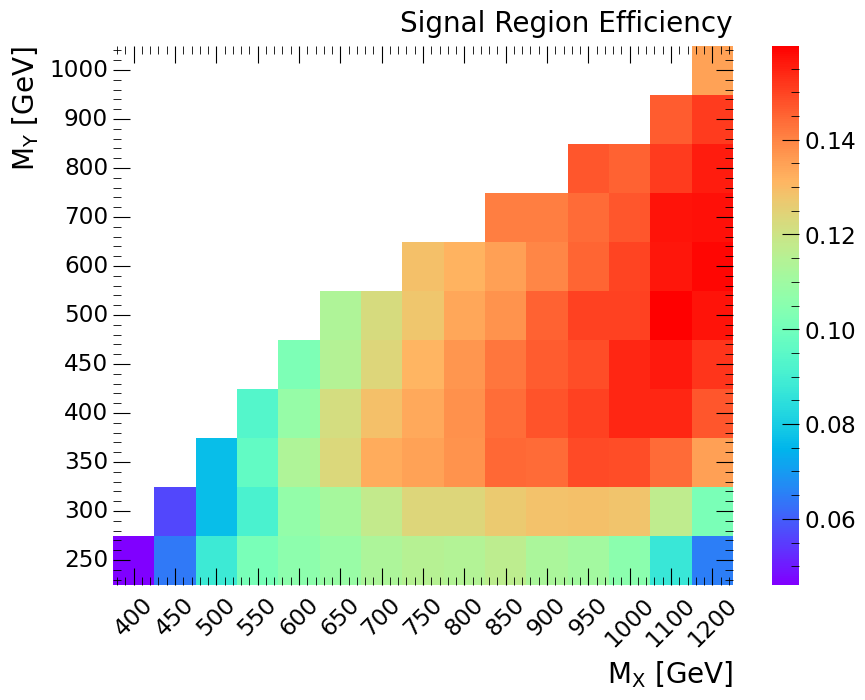

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_sr, cmap='rainbow', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_ylabel(r"$M_Y$ [GeV]")
ax.set_title("Signal Region Efficiency")
fig.savefig(f'{savepath}/sr_efficiency.pdf', bbox_inches='tight')

In [11]:
# bkg = Bkg(get_qcd_ttbar)

In [12]:
tree = SixB(get_NMSSM())
tree.spherical_region()

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root


.. initializing old FeynNet model
REGION: concentric


Text(1.0, 1.0, '$M_X=$ 700 GeV, $M_Y=$ 400 GeV')

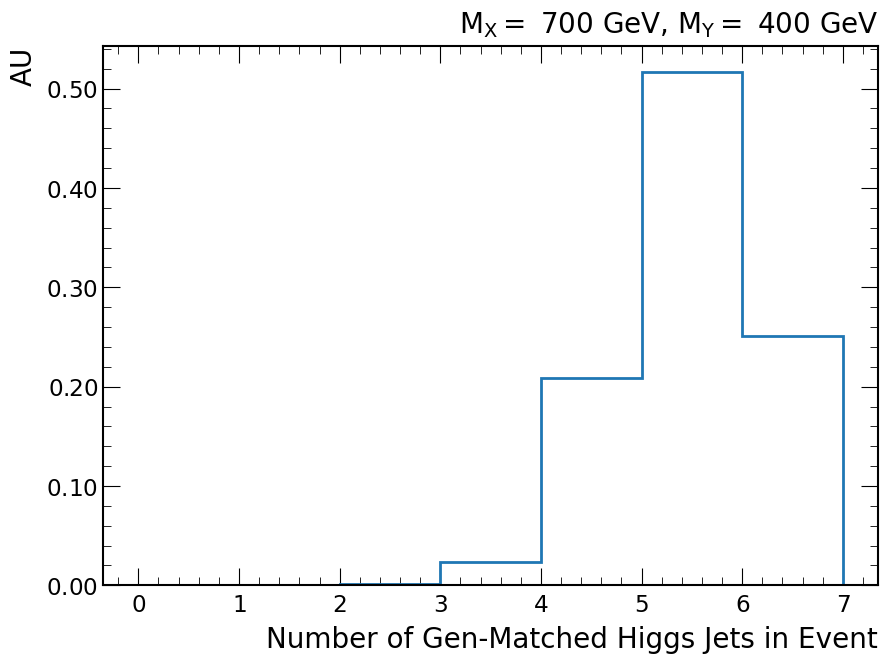

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

var = ak.sum(tree.jet_signalId[:,:6] > -1, axis=1)
Hist(var, bins=np.arange(0,8,1), ax=ax, density=True)

ax.set_xlabel('Number of Gen-Matched Higgs Jets in Event')
ax.set_ylabel('AU')
ax.set_title(tree.sample)


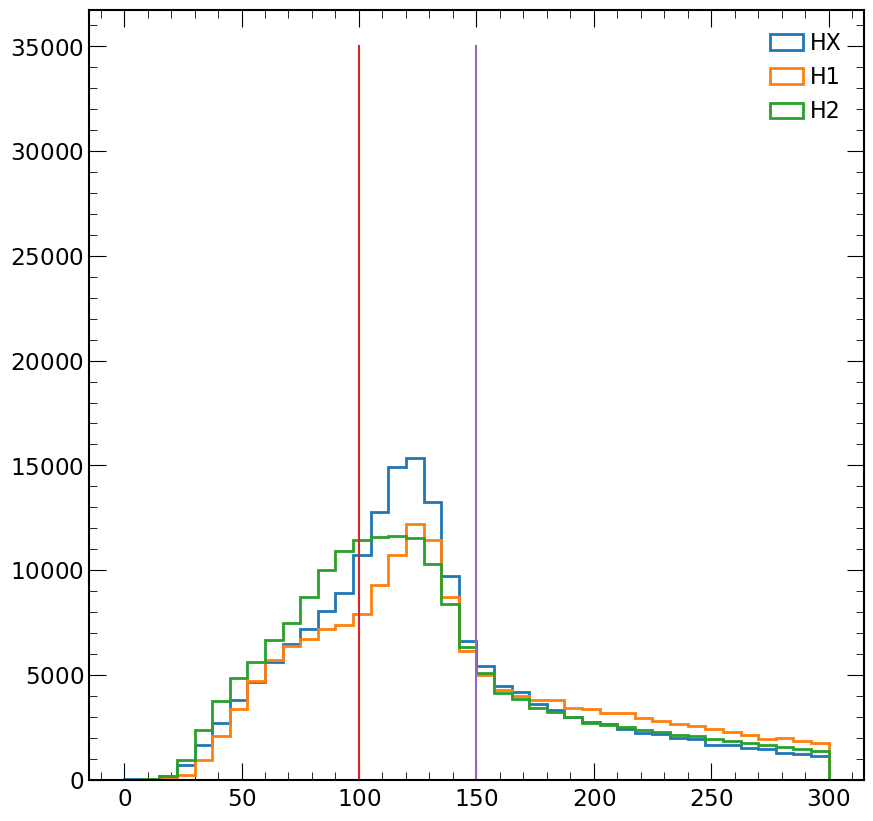

In [14]:
fig, ax = plt.subplots()

Hist(tree.HX.m[~tree.resolved_mask], bins=np.linspace(0,300,41), ax=ax, label='HX')
Hist(tree.H1.m[~tree.resolved_mask], bins=np.linspace(0,300,41), ax=ax, label='H1')
Hist(tree.H2.m[~tree.resolved_mask], bins=np.linspace(0,300,41), ax=ax, label='H2')
ax.plot([100,100],[0,35000])
ax.plot([150,150],[0,35000])


In [15]:
from matplotlib.patches import Circle

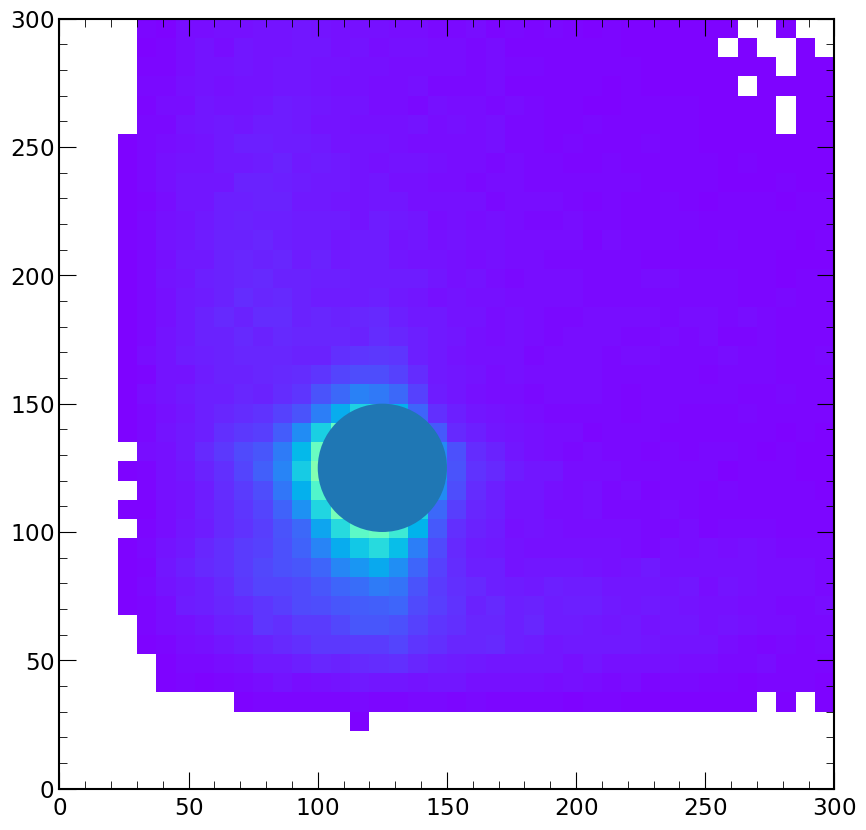

In [16]:
fig, ax = plt.subplots()

Hist2d(tree.HX.m, tree.H1.m, bins=[np.linspace(0,300,41), np.linspace(0,300,41)], ax=ax)
circle = Circle([125,125],25)
ax.add_patch(circle)

In [17]:
sel1 = (tree.HX.m-125)**2
print(np.mean(sel1[tree.resolved_mask] < 30**2))
sel2 = sel1 + (tree.H1.m-125)**2
print(np.mean(sel2[tree.resolved_mask] < 30**2))
sel3 = sel2 + (tree.H2.m-125)**2
print(np.mean(sel3[tree.resolved_mask] < 30**2))
sel = np.sqrt(sel3)
print(np.mean(sel[tree.resolved_mask] < 30))

0.763760516648892
0.6208229648062566
0.484106529209622
0.484106529209622
